In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

## Teil 2

The measured amplification is  0.2984 +- 0.0006  kV/V


Text(0.5, 1.0, 'Amplification of our power source')

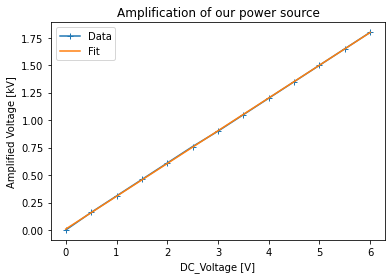

In [2]:
#constants
lambd= 632.8e-9 #[m]
d=2e-3 #[m]
L=20e-3 #[m]
n0=2.286
ne=2.2
# we first did set up the interferometer 
#now we measure the amplification of our power source
dc_voltage=np.array([0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6]) #[V] the error is 0.01V
high_voltage=np.array([0,0.16,0.31,0.46,0.61,0.76,0.9,1.05,1.2,1.35,1.5,1.65,1.8]) #[kV] +-0.01kV
plt.plot(dc_voltage,high_voltage,label="Data",marker="+")

def gerade(x,a,b):
    return a*x+b
popt,pcov=curve_fit(gerade,dc_voltage,high_voltage)
plt.plot(dc_voltage,gerade(dc_voltage,*popt),label="Fit")
print("The measured amplification is ", np.round(popt[0],4),"+-",np.round(np.sqrt(pcov[0][0]),4)," kV/V")
plt.legend()
plt.xlabel("DC_Voltage [V]")
plt.ylabel("Amplified Voltage [kV]")
plt.title("Amplification of our power source")

152.68649965436617 254007550782.68237


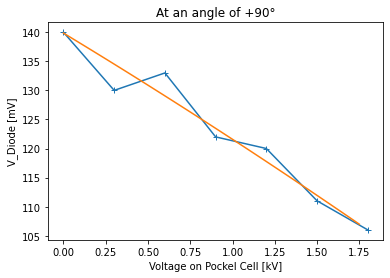

In [5]:
#now we put the photodiode at a maximum of the diffraction pattern 
#and measure the incoming voltage depending on the high Voltage we put on the pockel cell
#at angles of -90° and 90°

def cos_squared(V,a,phi_0,U_pi,c):
    return a*np.cos((0.5*(phi_0-np.pi*V/U_pi)))**2+c


PHI0=2*np.pi/lambd*L*(ne-n0)
high_voltage=np.array([0,0.3,0.6,0.9,1.2,1.5,1.8]) #[kV] +-0.01kV
V_photo_plus90=np.array([140,130,133,122,120,111,106]) #[mV] +-1mV
V_photo_minus90=np.array([48.2,51.9,58.6,70.5,77.9,84.0,90.8])#[mV +-0.1]
plt.plot(high_voltage,V_photo_plus90,marker="+",label="Data")
plt.title("At an angle of +90°")
plt.ylabel("V_Diode [mV]")
plt.xlabel("Voltage on Pockel Cell [kV]")
popt,pcov=curve_fit(cos_squared,np.concatenate((high_voltage[:1],high_voltage[3:])),np.concatenate((V_photo_plus90[:1],V_photo_plus90[3:])),maxfev=5000,p0=(popt2[0],np.pi/2,popt2[2],popt2[3]))
x=np.linspace(0,1.75,100)
plt.plot(x,cos_squared(x,*popt),label="Fit")
U_pi_plus=popt[2]
U_pi_plus_err=np.sqrt(pcov[2][2])
print(popt[2],pcov[2,2])
#We see that we can't fit a cos**2 with a U_pi that has a decent error, our data is too bad
# we should have taken more datapoints and with a more exact interferometer our data also might 
#have goten better
#for our calculations we will estimate V_pi roughly from the plot as V_pi=2.5kV if we assume the 
#first data point to be bad
U_pi_plus=2.5
U_pi_plus_err=1

2.2477383168216925 0.1832429986875906


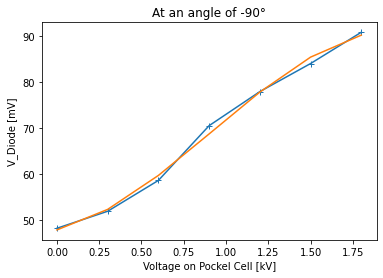

In [4]:
plt.plot(high_voltage,V_photo_minus90,marker="+",label="Data")
plt.title("At an angle of -90°")
plt.ylabel("V_Diode [mV]")
plt.xlabel("Voltage on Pockel Cell [kV]")
popt2,pcov2=curve_fit(cos_squared,high_voltage,V_photo_minus90,maxfev=5000,bounds=((-np.inf,-np.inf,0,-np.inf),(np.inf,np.inf,np.inf,np.inf)))
plt.plot(high_voltage,cos_squared(high_voltage,*popt2),label="Fit")
print(popt2[2],pcov2[2,2])
U_pi_minus=popt2[2]
U_pi_minus_err=pcov2[2][2]

In [6]:
print("U_pi_minus=",np.round(U_pi_minus,2),"+-",np.round(U_pi_minus_err,2),"kV")
print("U_pi_plus=",np.round(U_pi_plus,2),"+-",np.round(U_pi_plus_err,2),"kV")

U_pi_minus= 2.25 +- 0.18 kV
U_pi_plus= 2.5 +- 1 kV


In [7]:
#If we turn the cell by 180° we get a different phase position of the sinus the other differences
#are hard to calculate because of our bad values
r_13 = (d * lambd)/(L * n0**3 * U_pi_plus)
r_13_err = r_13 * U_pi_plus_err/U_pi_plus

r_33 = (d * lambd)/(L * ne**3 * U_pi_minus)
r_33_err = r_33 * U_pi_minus_err/U_pi_minus
print('r_13 = ', r_13,"+-", r_13_err)
print('r_33 = ', r_33,"+-", r_33_err)

r_13 =  2.118838148869497e-09 +- 8.475352595477989e-10
r_33 =  2.64394659763364e-09 +- 2.155431970414169e-10


[5.50875371e+00 4.08286964e-01 9.36693274e+02 2.16573335e+02]
V_pi1= 0.4082869640763137 +- 0.003187045853095713 kV


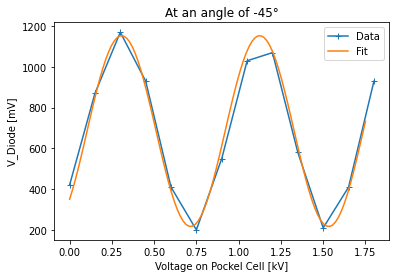

In [8]:
#now we do 2.2.3
def sin_squared(V,phi0,V_pi,a,c):
    return a*np.sin(phi0/2-np.pi/2*V/V_pi)**2+c
hV=np.array([0,0.15,0.3,0.45,0.6,0.75,0.9,1.05,1.2,1.35,1.5,1.65,1.8])
V_pd_minus45=np.array([420,870,1170,930,410,200,550,1030,1070,580,210,410,930])
V_pd_plus45=np.array([687,203,280,1240,1270,600,420,390,650,1290,1170,377,180])
delta_hv=np.ones(13)*10
popt,pcov=curve_fit(sin_squared,hV,V_pd_minus45,maxfev=10000,p0=(np.pi,1,1000,200))
x=np.linspace(0,1.75,100)
plt.plot(hV,V_pd_minus45,marker="+",label="Data")
plt.plot(x,sin_squared(x,*popt),label="Fit")
plt.legend()
plt.title("At an angle of -45°")
plt.ylabel("V_Diode [mV]")
plt.xlabel("Voltage on Pockel Cell [kV]")
print(popt)
print("V_pi1=",popt[1],"+-",np.sqrt(pcov[1][1]),"kV")

[1.34076885e+00 4.02955700e-01 1.10121837e+03 1.84023839e+02]
V_pi2= 0.40295569993325897 +- 0.01036326729360849 kV


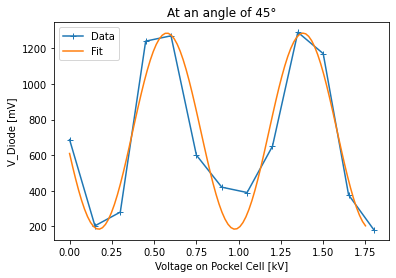

In [9]:
popt2,pcov2=curve_fit(sin_squared,hV,V_pd_plus45,maxfev=10000,p0=(np.pi,0.7,1000,200))
x=np.linspace(0,1.75,100)
plt.plot(hV,V_pd_plus45,marker="+",label="Data")
plt.plot(x,sin_squared(x,*popt2),label="Fit")
plt.legend()
plt.title("At an angle of 45°")
plt.ylabel("V_Diode [mV]")
plt.xlabel("Voltage on Pockel Cell [kV]")
print(popt2)
print("V_pi2=",popt2[1],"+-",np.sqrt(pcov2[1][1]),"kV")

In [10]:
#we measure V_pi_calc' by taking the mean from our two values
V_pi_calc2=0.5*(popt[1]+popt2[1])
V_pi_calc2_err=0.5*np.sqrt(pcov[1][1]+pcov2[1][1])
print("V_pi_calc'=",V_pi_calc2,"+-",V_pi_calc2_err,"kV")
#in this measurement we get a solid value for V_pi_calc'
#we can calculate V_pi_calc by
V_pi_calc=d*lambd/(L*r_33*ne**3-r_13*n0**3)
V_pi_calc_err=np.sqrt((r_33_err*d*lambd/L/(r_33*ne**3-r_13*n0**3)**2*ne**3)**2+(r_13_err*d*lambd/L/(r_33*ne**3-r_13*n0**3)**2*n0**3)**2)
print("V_pi_calc=",V_pi_calc,"+-",V_pi_calc_err,"kV")
V_pi_lit=0.38

V_pi_calc'= 0.40562133200478634 +- 0.00542112927046824 kV
V_pi_calc= -0.05113753306336099 +- 81.40848956237268 kV


1.   we can see that the graphs are phaseshifted, by about (5.5-1.34)*2=2.64pi
so by close to 0.5 Pi
2.   As noted in the skript the transmittance is T(V)=sin^2(phi0/2-pi*V/(2*V_pi)) so to have a minimum
at V=0 we would need a value phi0 =0 this is not given since n_e!=n_o
and Phi0=2*pi/lambda*L*(ne-n0)
6.  If we compare the V_pi values from the literature with the ones we measured we see, that our 
first measurement was very bad and the values do not agree with the literature at all, 
the error also is really big
the 2nd measurement though agrees fairly well with the literature value, we are in the same
range of values and have a deviation of under 10%, this is acceptable though the sigma-deviation
 is really high with almost 5sigma

In the last part we were able to transmit a signal from the function generator which was of a very weak strength in the range of Volts over the pockel cell to the photodiode were we could pick it up with the oscilloscope. We used different offsets. Good working points at 45° are 0.3kV and 1.2kV because there the gradient of the signal is really high as we can see in our graph. If we have a low gradient as at 0.5kV e.g. we wouldn't see the signal as well. We were able to transmit a signal of 5kHz without problems. The signal-to-noise ratio should be better with a more powerful laser since then the laser signal-to-noise ratio is better. We just need to take care not to saturate the photodiode. Of course it also helps to amplify the amplitude of our generator signal. On the other hand it would not help to turn the high Voltage offset up, since in those dimensions our signal is periodic as we have seen in the other exercises. 

## Teil 3

### dependency of angles and frequency
We first calculate the angles between the maxima measured. Therefore we apply the formula $$\alpha=\arctan\bigg(\frac{d}{l}\bigg)$$ With error propagation we find that $$\Delta \alpha = \sqrt{\bigg(\frac{\partial \alpha}{\partial l}\Delta l\bigg)^2+\bigg(\frac{\partial \alpha}{\partial d}\Delta d\bigg)^2}= \sqrt{\bigg(\frac{d}{d^2+l^2}\Delta l\bigg)^2 + \bigg(\frac{l}{d^2+l^2}\Delta d\bigg)^2}$$
Afterwards we have to correct for a factor of $\frac{180}{\pi}$ since we want an unit of degree.

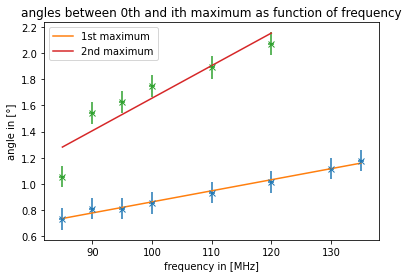

In [11]:
l = 141  # [cm] distance between AOM and Screen
delta_l = 2 # [cm]

# first order
f_I = np.array([85,90,95,100,110,120,130,135])  # [MHz]
delta_f_I = np.ones(8)*0.5 # [MHz]
dI = np.array([1.8,2.0,2.0,2.1,2.3,2.5,2.75,2.9])  # distance between 0th and 1st maximum [cm]
delta_dI = np.ones(8)*0.2 # [cm] 

# second order
f_II = np.array([85,90,95,100,110,120])  # [MHz]
delta_f_II = np.ones(6)*0.5 # [MHz]
dII = np.array([2.6,3.8,4,4.3,4.65,5.1])  # distance between 0th and 2nd maximum [cm]
delta_dII = np.ones(6)*0.2  # [cm]

# calculate the angles
def alpha(l,d):
    return np.arctan(d/l)*180/(np.pi)
def delta_alpha(l,d,delta_l,delta_d):
    return np.sqrt( (d/(d**2+l**2)*delta_l)**2 + (l/(d**2+l**2)*delta_d)**2 ) *180/(np.pi)

alpha_I = alpha(l,dI)
delta_alpha_I = delta_alpha(l,dI,delta_l,delta_dI)

alpha_II = alpha(l,dII)
delta_alpha_II = delta_alpha(l,dII,delta_l,delta_dII)

# linear fit to the data
poptI, pcovI = curve_fit(gerade, f_I, alpha_I, sigma=delta_alpha_I)
poptII, pcovII = curve_fit(gerade, f_II, alpha_II, sigma=delta_alpha_II)
plt.errorbar(f_I, alpha_I, xerr=delta_f_I, yerr=delta_alpha_I, fmt='x')
plt.plot(f_I, gerade(f_I, *poptI), label='1st maximum')

plt.errorbar(f_II, alpha_II, xerr=delta_f_II, yerr=delta_alpha_II, fmt='x')
plt.plot(f_II, gerade(f_II, *poptII), label='2nd maximum')

plt.title('angles between 0th and ith maximum as function of frequency')
plt.xlabel('frequency in [MHz]')
plt.ylabel('angle in [°]')
plt.legend()
plt.show()

In [12]:
# fit coefficients:
print('a_I = (', np.round(poptI[0],4), "\pm", np.round(np.sqrt(pcovI[0][0]),4), 'deg/MHz')
print('b_I = (', np.round(poptI[1],2), "\pm", np.round(np.sqrt(pcovI[1][1]),2), 'deg')
print('a_II = (', np.round(poptII[0],3), "\pm", np.round(np.sqrt(pcovII[0][0]),3), 'deg/MHz')
print('b_II = (', np.round(poptII[1],1), "\pm", np.round(np.sqrt(pcovII[1][1]),1), 'deg')

a_I = ( 0.0084 \pm 0.0004 deg/MHz
b_I = ( 0.02 \pm 0.04 deg
a_II = ( 0.025 \pm 0.005 deg/MHz
b_II = ( -0.8 \pm 0.5 deg


The expected linear dependency was found and satisfactorily fitted.
We see that the offset in both cases is basically 0 and doesnt deviate significantly from 0. Therefore only our values for a_i are interesting. We found $a_I=0.0084\pm0.0004 \frac{\circ}{MHz}$ and $a_{II}=0.025\pm 0.005 \frac{\circ}{MHz}$

### dependency of intensity and frequency
We measured the intensity of the first maximum in relation to the 0th one against the frequency.

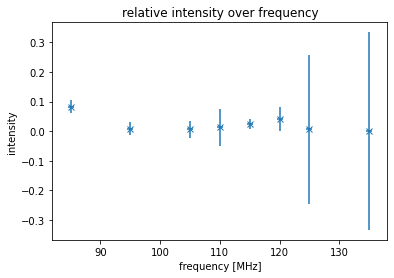

In [13]:
f2 = np.array([85,95,105,115,125,135,110,120]) # [MHz]
delta_f2 = np.ones(8)*0.5 # [MHz]

U_0 = np.array([5.65,5.7,6.07,6.02,6.45,6.45,6.07,6])
delta_U_0 = np.array([0.01,0.05,0.05,0.05,0.1,0.1,0.05,0.05])
U_1 = np.array([0.470,0.052,0.038,0.148,0.040,0.003,0.080,0.255])
delta_U_1 = np.array([0.01,0.001,0.001,0.002,0.01,0.001,0.005,0.01])

I = U_1/U_0 # relative intesity between the two maxima as fraction of the photodiode voltage
delta_I = np.sqrt( (delta_U_1/U_1)**2  + (delta_U_0/U_0)**2 ) # error propagation

plt.errorbar(f2, I, xerr=delta_f2, yerr=delta_I, fmt='x')
plt.title('relative intensity over frequency')
plt.xlabel('frequency [MHz]')
plt.ylabel('intensity')
plt.show()

We find almost no dependency between intesity and frequency. Since the values for 125 and 135 MHz are nearly zero and therefore get a high relative error.
If we exclude these we get the following plot.

[ 85  95 105 115 110 120]


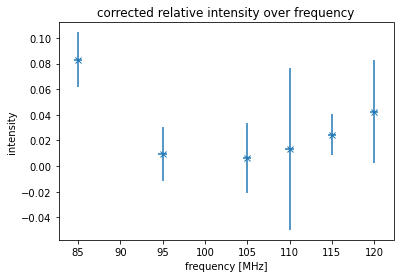

In [14]:
f2_corr = np.delete(f2,[4,5])
delta_f2_corr = np.delete(delta_f2,[4,5])
print(f2_corr)
I_corr = np.delete(I,[4,5])
delta_I_corr = np.delete(delta_I,[4,5])

plt.errorbar(f2_corr, I_corr, xerr=delta_f2_corr, yerr=delta_I_corr, fmt='x')
plt.title('corrected relative intensity over frequency')
plt.xlabel('frequency [MHz]')
plt.ylabel('intensity')
plt.show()

In this corrected plot we still find no clear dependency of the intensity against the frequency. We expected that the intensity should drop here since the angles grow as well and beams that are diffracted ''more'' must have lower intensity. More values would be needed to show that dependency.

### dependency of intensity and amplitude
Here we want to plot the intesity over the amplitude of the AOMs acoustic signal.

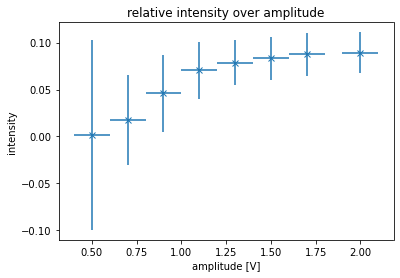

In [15]:
# all units are [V]
U_amp = np.array([0.5,0.7,0.9,1.1,1.3,1.5,1.7,2.0]) 
delta_U_amp = np.ones(8)*0.1
U_3 = np.array([6.37,6.26,5.87,5.75,5.7,5.7,5.55,5.65])
delta_U_3 = np.array([0.1,0.1,0.1,0.1,0.05,0.05,0.05,0.05])
U_4 = np.array([0.01,0.111,0.27,0.405,0.447,0.475,0.485,0.505])
delta_U_4 = np.array([0.001,0.005,0.01,0.01,0.01,0.01,0.01,0.01])

I2 = U_4/U_3 
delta_I2 = np.sqrt( (delta_U_4/U_4)**2  + (delta_U_3/U_3)**2 )

plt.errorbar(U_amp, I2, xerr=delta_U_amp, yerr=delta_I2, fmt='x')
plt.title('relative intensity over amplitude')
plt.xlabel('amplitude [V]')
plt.ylabel('intensity')
plt.show()

We see that the intesity grows with the amplitude. This effect was expected since we had to put in a minimum voltage to even see the effects of the AOM, why we werent able to record amplitudes below 0.5V

### Calculation of Sound Velocity
from $\sin\theta_B=\frac{1}{2}\frac{m\lambda}{\lambda_s}$ and $v=\lambda f$ we find with $\sin\theta\approx\theta$ for small $\theta$
$$ \sin\theta_B\frac{v_s}{f_s}=\frac{1}{2}m\lambda \quad \Rightarrow \quad v_s = \frac{1}{2}m\lambda\frac{f_s}{\sin\theta_B}\approx\frac{1}{2}m\lambda\frac{f_s}{\theta_B}=\frac{1}{2}m\lambda\cdot a$$
$$ \Delta v_s = \frac{1}{2}m\lambda\cdot \Delta a = v_s\frac{\Delta a}{a}$$
With $\lambda \approx 633nm$ we can calculate the mean sound velocity from the angles as function of frequency. We use $m=1$ so the first maximum.

In [16]:
lambd = 633*10**(-9) #[m]
a = poptI[0]*np.pi/180*1e-6  # convert to radian per Hz
delta_a = np.sqrt(pcovI[0][0])*np.pi/180*1e-6  # convert to radian per Hz

v_s = lambd/(2*a)
delta_v_s = v_s*delta_a/a

print('v_s = ', np.round(v_s,0), '+-', np.round(delta_v_s,0), ' m/s')

v_s =  2147.0 +- 98.0  m/s


### Calculation of Wavelength and Grating preriods 
From this expected sound velocity we can determine the acoustic wavelength from $$\lambda_s=\frac{v_s}{f_s}\quad \text{and}\quad \Delta \lambda_s = \lambda_s\sqrt{\bigg(\frac{\Delta v_s}{v_s}\bigg)^2+\bigg(\frac{\Delta f_s}{f_s}\bigg)^2}$$

In [18]:
f3= f_I*10**6             # get f_I in Hz
delta_f3= delta_f_I*10**6

av_lambd_s = np.mean(v_s/(f3))
delta_av_lambd_s = np.mean(v_s/f3*np.sqrt((delta_v_s/v_s)**2 + (delta_f3/f3)**2))

print('lambda_s = ', np.round(av_lambd_s,7), '+-', np.round(delta_av_lambd_s,7), ' m')

lambda_s =  2.04e-05 +- 9e-07  m


Our sound wavelength turned out to be $\lambda_s = (20.4\pm0.9)\mu m$.

The grating periods can be calculated via with $L$ from the script $$n=\frac{L}{\lambda_s} \quad \text{und}\quad \Delta n = n\frac{\Delta \lambda_s}{\lambda_s}$$

In [19]:
L = 20 # [mm]

n = L*10**(-3)/(av_lambd_s) # mm to m
delta_n = n*delta_av_lambd_s/av_lambd_s

print('n =', np.round(n,0), '+-', np.round(delta_n,0))

n = 982.0 +- 45.0


### Calculation of Sound Power at optimal deflection efficiency.
For the Sound Power the equation (3.4) from the script ist being used.
$$ R= \sin^2\bigg(\frac{\pi L}{\lambda \cos \theta_B}\sqrt{\frac{M_2 I_s}{2}}\bigg) $$
At optimal deflection efficiency we know that $R=1$ as well as $\cos(\theta_B)=1$ and therefore $$\frac{\pi}{2}=\frac{\pi L}{\lambda \cos \theta_B}\sqrt{\frac{M_2 I_s}{2}} \quad \rightarrow \quad I_s = \dfrac{\lambda^2}{2\,L^2\, M_2}$$ 
The sound power $P$ can then be calculated over the product of $I_s$ and the area $A$
$$P=A\cdot I_s = L\cdot h \cdot I_s = L \cdot h \, \dfrac{\lambda^2}{2\,L^2\, M_2} = \dfrac{h\cdot\lambda^2}{2\,L\, M_2} $$

In [21]:
#from the script we find
h = 3e-3        # [m]
M_2 = 34.5e-15   # [s^3/kg]

P_s = h*lambd**2/(2*(L*10**(-3))*M_2)

print('P_s =', P_s, 'W')

P_s = 0.8710630434782609 W


### Optimal Frequency in the AOM
The optimal frequency was read off the third table in the protocol. It was determined from the largest voltage at the photodiode in the first maximum. We optained a value of 120Hz. This value is of course dependend on the AOM we use.

## Two perpendicular AOMs
For the two perpendicular AOMs we saw a lattice appear as a diffraction pattern. 
The effects of frequency and amplitude modulation stayed the same for the second AOM, but now we could turn the two spatial directions seperate from each other. 

Adding a frequency to the amplitude we could see the points starting to blink. Without a phase shift the dots move simoultaneously. With a added phaseshift we can see them moving along that shifted phase. Additionally we observed that the (+1,+1) maxima moved now on circles. This phenomenon reminded us of the circular polarized light we observed in the first part of this lab course, since there the polarization direction moves turns around as well. 
When we use a rectangular signal form rather than a sine wave we see the maxima jump on our screen.
When we finally turn the frequency to be double the first frequency we can draw a figure 8 on our screen.